## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
%matplotlib inline
import os
import tensorflow as tf
import keras
tf.logging.set_verbosity(tf.logging.ERROR)

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 33s 667us/step - loss: 1.9570 - acc: 0.2933 - val_loss: 1.7847 - val_acc: 0.3604
Epoch 2/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.7292 - acc: 0.3818 - val_loss: 1.7059 - val_acc: 0.3913
Epoch 3/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6225 - acc: 0.4214 - val_loss: 1.6208 - val_acc: 0.4148
Epoch 4/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5565 - acc: 0.4429 - val_loss: 1.5288 - val_acc: 0.4512
Epoch 5/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.5077 - acc: 0.4617 - val_loss: 1.4763 - val_acc: 0.4716
Epoch 6/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4744 - acc: 0.4724 - val_loss: 1.4615 - val_acc: 0.4772
Epoch 7/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4324 - acc: 0.4901 - val_loss: 1

C:\Users\Enoch\Miniconda3\envs\QGPU\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.617438). Check your callbacks.
  % delta_t_median)
C:\Users\Enoch\Miniconda3\envs\QGPU\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.309720). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 6s 127us/step - loss: 0.1469 - acc: 0.9516 - val_loss: 4.9509 - val_acc: 0.4839
Epoch 340/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0599 - acc: 0.9791 - val_loss: 4.9245 - val_acc: 0.4897
Epoch 341/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0285 - acc: 0.9912 - val_loss: 5.0027 - val_acc: 0.4947
Epoch 342/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0193 - acc: 0.9947 - val_loss: 4.9802 - val_acc: 0.4929
Epoch 343/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0162 - acc: 0.9955 - val_loss: 5.0789 - val_acc: 0.4976
Epoch 344/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1895 - acc: 0.9458 - val_loss: 5.1789 - val_acc: 0.4738
Epoch 345/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.2698 - acc: 0.9218 - val_loss: 4.9400 - val_acc: 0.4875
Epoch 346/500
50000/50000 [

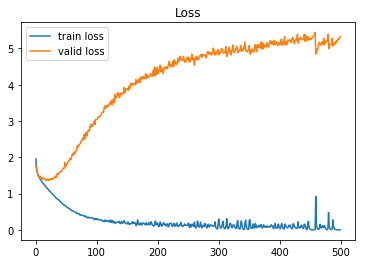

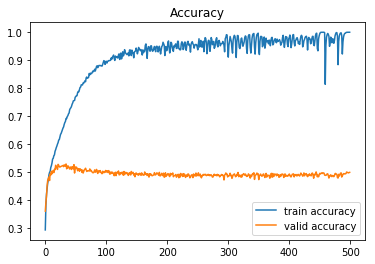

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 5.3218 - val_acc: 0.4989
Epoch 2/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 5.3195 - val_acc: 0.4990
Epoch 3/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 5.3180 - val_acc: 0.4991
Epoch 4/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 5.3170 - val_acc: 0.4997
Epoch 5/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.3161 - val_acc: 0.4999
Epoch 6/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.3155 - val_acc: 0.4999
Epoch 7/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.3150 -

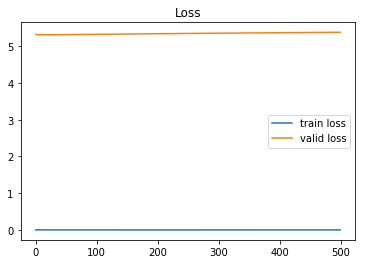

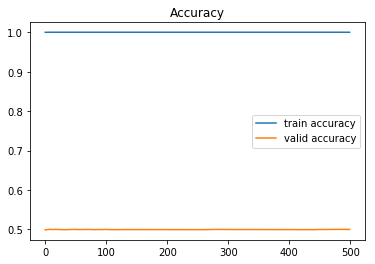

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()